<a href="https://colab.research.google.com/github/abolfazlahmadi/IntroToAiAndMlClass/blob/main/GH1024356_M504A_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assessment Submission Form
|||
| :--------------------------   | :-------------------------------------------------: |
|**Student Number** | **GH1024356** |
|**Module Code**| **M504A AI and Applications (WS0124)** |
|**Module Title**| **AI and Applications** |
|**Module Tutor**| **Prof. Amirhossein Jamalian** |
|**Date Submitted**| **2024-04-01** |


***By submitting my assignment, I automatically sign the Assessed Submission Form and take responsibility for my submission.***

Declaration of Authorship\
 I declare that all material in this assessment is my own work except where there is clear acknowledgement and appropriate reference to the work of others.

I fully understand that the unacknowledged inclusion of another person’s writings or ideas or works in this work may be considered plagiarism and that, should a formal investigation process confirms the allegation, I would be subject to the penalties associated with plagiarism, as per GISMA Business School, University of Applied Sciences’ regulations for academic misconduct.

***Abolfazl Ahmadi*** \
***2024-04-01*** \



# Introduction

The market of new and used car in The United States Of America is a big and confusing market. There will be a lot of changes and trends could change every moment which affects the prices, buying willingness, car productions. These changes and trends could be related to car brands, models, colors, trim, features, power and any other aspects.
One of the greatest multi branch car dealer companies which is selling the new and used cars, is trying to analyze these data and fit the market. This company has data of its car sales during years. The goal is to compare the sales of years and predict the upcoming changes in sales.


## Dataset

(SYED ANWAR,2024) The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.
The dataset could be accessed through the original link of kaggle website or my own shared folder in google drive from below links:


*   [Dataset in kaggle website](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data/)
*   [Dataset in my google drive](https://drive.google.com/file/d/1KimpE4XdHYvwGz_du4Y39Djp3orm-NM9/view?usp=sharing)



## Problem Statement

There are several unanswered question around the business of our company and most of them are related to predicting our future customer needs to increase the sales. To overcome that, we need to understand our best sales time periods, best seller manufacturers, most wanted trim, colors, models and more. Also, benefit matters here, so the difference between the selling price and estimated value of the car(MMR) could affect the performance even more than the number of sales.
To achieve the goal, in this project I will try to answer the following five key questions by analyzing the dataset.


1.   **What is the selling trends during past years? Is there growth?**
2.   **Which manufacturer is the most popular for sale?**
3.   **To understand the taste of market, what are the sum of sales per year group by the color?**
4.   **Which type of gear are better to sell? Automatic or manual?**
5.   **In the matter of mileage odometer, what mileages have most share of sales in our company?**
6.   **What are the most impactful car features for a profitable selling?**


# Solution

## Import libraries and dataset

It is important to include some libraries into our python code to get benefit from previous developed packages. For this project will need some packages related to process the data in lists, such as numpy and pandas. In addition to them, we will use some other packages to plot our charts such as matplotlib.


In [109]:
# import packages

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans as km
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns


## Data Exploration

Our dataset has several columns including the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.\
We need to upload our dataset to colab to be able to work on it. Checking first rows of the dataset helps us to better understanding of date. The dataset which has been uploaded has 558837 rows and 16 columns. To answer our questions we need to use most of the columns but no model,trim, exact time of sales, or the VIN identifier of the sold car. So I will reduce these extra columns in the preprocessing section. Also, name of some columns are needed to change to be more clear, such as mmr column which is the a standard estimation of the car value.\
By describing the dataset, we realize that what are the maximum and minimum of each column, the variety, count of rows and more. I realized that some of data are missed so I have to either remove those null data or replace it with a meaningful data in the preprocessing part.\
Being familiar with our data and know the distinct value of each column could help us analyzing the data. For instance, we realized that our data consist of 34 years between 1982 to 2015. Also, it contains 96 different manufacturers. \
Finally, to see the relation between numerical columns we can use corr function in pandas or try to use scattered chart. Of course, in the preprocessing and feature engineering part, we can product new numerical attributes instead of string original attributes, such as gear modes(0=manaul, 1=automatic for example). In this chart we can see current relation between our columns. For instance, it is obvious in the first chart that the selling_price and MMR(standard estimation of car value) is totally related and approximately the same. There are just a few outlier data in which these two parameters were irrelevant.






In [110]:
# read the csv file - import dateset to a pandas list
df_org=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/MyData/car_prices.csv")
#show the first 3 rows of our original dataset
df_org.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [111]:
# the original dataset has 558837 rows and 16 columns
df_org.shape

(558837, 16)

In [112]:
# check type of each column
df_org.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [113]:
# checking statistics and summary of the dataset
df_org.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [114]:
# check missing data
df_org.isnull().count()

year            558837
make            558837
model           558837
trim            558837
body            558837
transmission    558837
vin             558837
state           558837
condition       558837
odometer        558837
color           558837
interior        558837
seller          558837
mmr             558837
sellingprice    558837
saledate        558837
dtype: int64

In [115]:
# get to know about unique values of each column
df_org.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

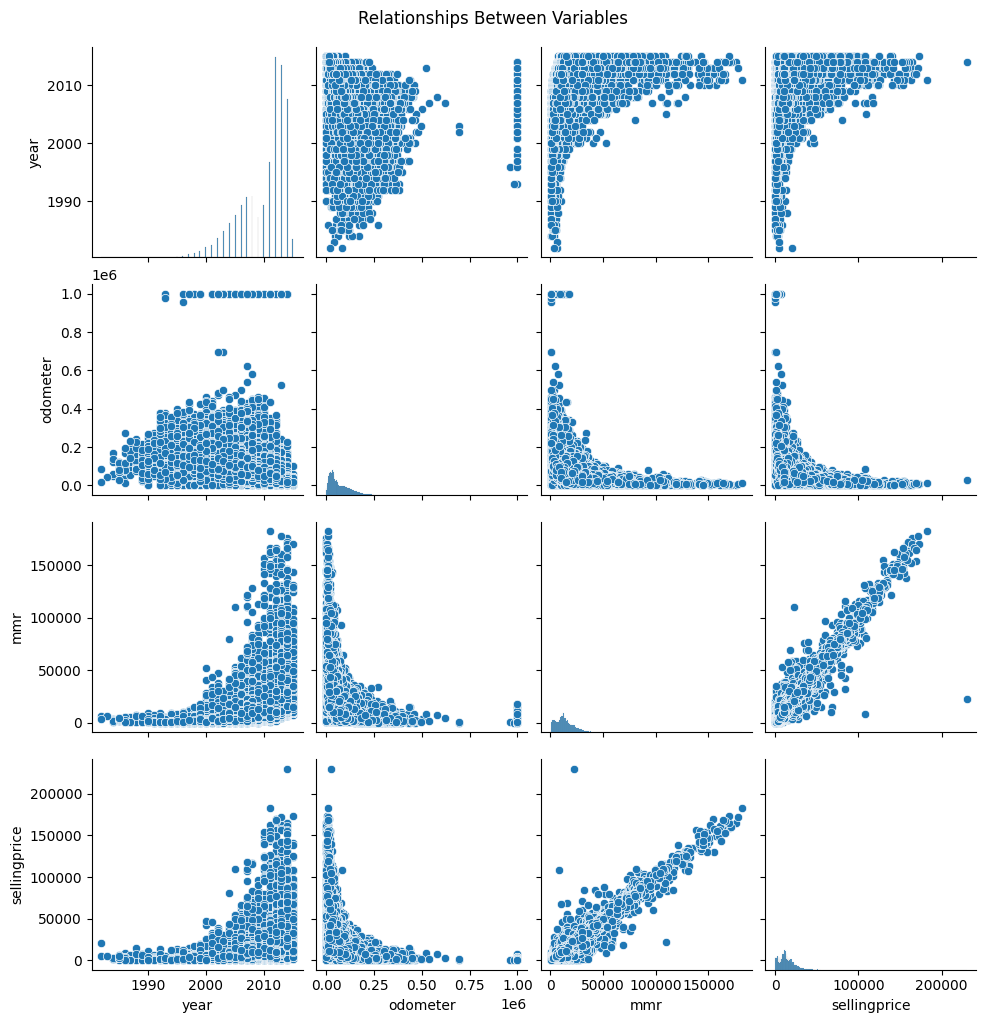

'In this chart we can see current relation between our columns.\n For instance, it is obvious in the first chart that the selling_price and MMR(standart estimation of car value)\n  is totally related and approximately the same.\n   There are just a few outlier data in which these two parameters were irrelevant.'

In [116]:
# see the relation between our numerical columns
numerical_columns = ['year', 'odometer', 'mmr', 'sellingprice']
pair_plot = sns.pairplot(df_org[numerical_columns])
plt.suptitle("Relationships Between Variables", y=1.02)
plt.show()
"""In this chart we can see current relation between our columns.
 For instance, it is obvious in the first chart that the selling_price and MMR(standard estimation of car value)
  is totally related and approximately the same.
   There are just a few outlier data in which these two parameters were irrelevant."""


## Data Preprocessing
The first step of data preprocessing is to drop the unwanted attributes and rename the useful ones to make it easier to analyze.  Therefore, I decided to drop the identifier id of the cars and exact sales time, and the seller name, which I do not refer to any of those data in my report and will not affect the questions. Then, I renamed the attributes to a meaningful and clear names.   




In [117]:
# drop unwanted attributes
df = df_org.drop(columns=['vin', 'seller','saledate','trim','model','state','interior'])
# rename attributes
df = df.rename(columns={'make': 'manufacturer','transmission':'gear','mmr':'estimatedprice'})
df.head(1)

,year,manufacturer,body,gear,condition,odometer,color,estimatedprice,sellingprice
0,2015,Kia,SUV,automatic,5.0,16639.0,white,20500.0,21500.0



Later, for missing values I had to either fill the missed values with data or drop the null values. For condition, missed value were related to new cars, so we fill the missed ones with 0(best condition).Since there were less than 1% of data were missed and that percentage will not affect the result I decided to drop the null values. In addition to that, dropping duplicated data is also necessary. There were some records that car manufacturer was missed but other attributes like color and type were filled. Since these records help us understanding the taste of customers like the color, I decided to fill the missed ones with concatenation of their color, gear type and bodytype. \
I found some noise during the describing dataset. For some records, instead of gear the body were saved. There were a few of them and I removed these noisy data.

In [118]:
# fill condition missed value with best value 0 since they are new cars. Also, the default value of sedan were missed in filling forms.
df['condition']=df['condition'].fillna(0)
df['odometer']=df['odometer'].fillna(0)
df['body']=df['body'].fillna('Sedan')
df['gear']=df['gear'].fillna('manual')
df['manufacturer'] = df.apply(lambda row: str(row['color']) + str(row['gear']) + str(row ['body']) if pd.isnull(row['manufacturer']) else row['manufacturer'], axis=1)

#I found some noise during the describing dataset. For some records, instead of gear the body were saved. There were a few of them and I removed these noisy data.
df = df[df['gear'] != 'Sedan']
#The data of year 2015 is not complete. only 3 month of data was available so in comparison to other years it could be misleading.
df = df[df['year'] != 2015]
# drop null and duplicated values
df=df.dropna()
df=df.drop_duplicates()
df.head(3)

,year,manufacturer,body,gear,condition,odometer,color,estimatedprice,sellingprice
2,2014,BMW,Sedan,automatic,45.0,1331.0,gray,31900.0,30000.0
4,2014,BMW,Sedan,automatic,43.0,2641.0,gray,66000.0,67000.0
6,2014,BMW,Sedan,automatic,34.0,14943.0,black,69000.0,65000.0


In [119]:
df.count()

year              548663
manufacturer      548663
body              548663
gear              548663
condition         548663
odometer          548663
color             548663
estimatedprice    548663
sellingprice      548663
dtype: int64

By having these steps done, we have cleared the noisy data, null value, reducing unwanted dimensions, normalized attributes and remove duplicated values. Now we are ready to use our clean Dataset, named ***df*** in our project. \


## Feature Engineering
In feature engineering part we need to eliminate extra data and add special attribute by combining current attribute or design new calculated measures. In our dataset, we need to measure a new metric which name is benefit. Benefit is calculated by subtracting sellingprice from estimatedprice. In the following code I add this new feature. Other features sounds like good, as they are normal, categorized and cleaned before.


In [120]:
# add a calculated metric to our dataset. this calculated measure named BENEFIT and measured by subtracing sellingprice from estimatedprice.
df['benefit'] = df['sellingprice'] - df['estimatedprice']
df.head(5)


,year,manufacturer,body,gear,condition,odometer,color,estimatedprice,sellingprice,benefit
2,2014,BMW,Sedan,automatic,45.0,1331.0,gray,31900.0,30000.0,-1900.0
4,2014,BMW,Sedan,automatic,43.0,2641.0,gray,66000.0,67000.0,1000.0
6,2014,BMW,Sedan,automatic,34.0,14943.0,black,69000.0,65000.0,-4000.0
7,2014,Chevrolet,Sedan,automatic,2.0,28617.0,black,11900.0,9800.0,-2100.0
8,2014,Audi,Sedan,automatic,42.0,9557.0,white,32100.0,32250.0,150.0




## Visualization and Reports

Everything is ready to answer the business questions. The dataset is cleaned, normalized, and ready to get the results by adding new calculated features. The result of each analysis is presented by a chart or table to be easy to read by stakeholders. Therefore, we need to focus on each question. In the following paraghraph, I will discuss the first question. \

### What is the selling trends during past years? Is there growth?
It is the first and almost the easiest question to answer. I need to group the sales by year of the sale and sum the sales. Also, order the result by year to see the trends. Finally, create a chart of the result. \
By using numpy package, I draw a trend line for sum of sales of years to understand the growth.  \




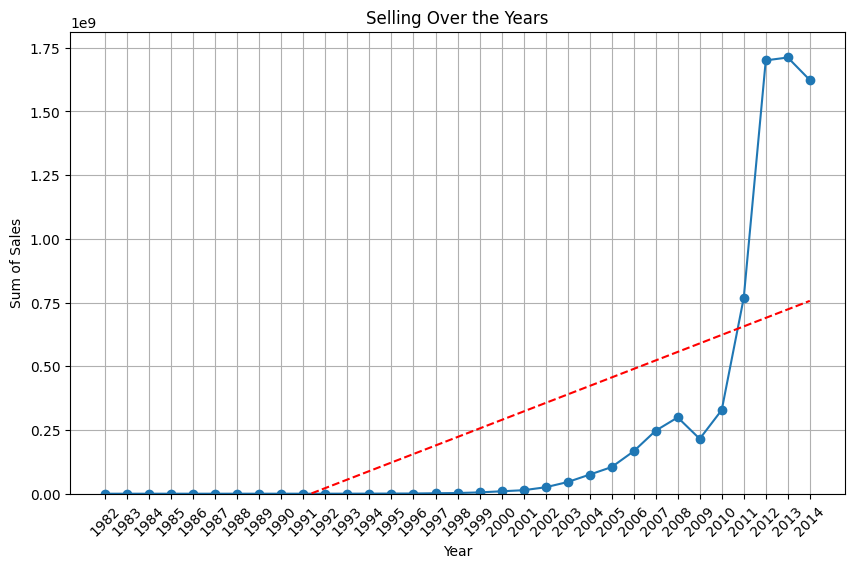

In [121]:
# grouping by year and calculating the sum of selling price for each year
selling_year = df.groupby('year')['sellingprice'].sum().reset_index()

# Plotting the selling of years
plt.figure(figsize=(10, 6))
plt.plot(selling_year['year'], selling_year['sellingprice'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sum of Sales')
plt.title('Selling Over the Years')

# Adding a trend line
z = np.polyfit(selling_year['year'], selling_year['sellingprice'], 1)
p = np.poly1d(z)
plt.plot(selling_year['year'], p(selling_year['year']), "r--")
plt.xticks(selling_year['year'], rotation=45)
# Set y-axis lower limit to 0
plt.ylim(0)


plt.grid(True)
plt.show()


\
As it is obvious, there is a huge raise in last years. We can see the trend line(red line) which is going upwards. The sales of years before 2000 is near zero. On the other hand, after 2010, we saw a huge raise in sales and in 2014 it is above than 1.5 billion dollars. \


###Which manufacturer is the most popular for sale?
To realize which is the most popular manufacturer, I need to group data by manufacturer and try to sum the sales. There are a lot of manufacturers, so I decided to show only top twenty.



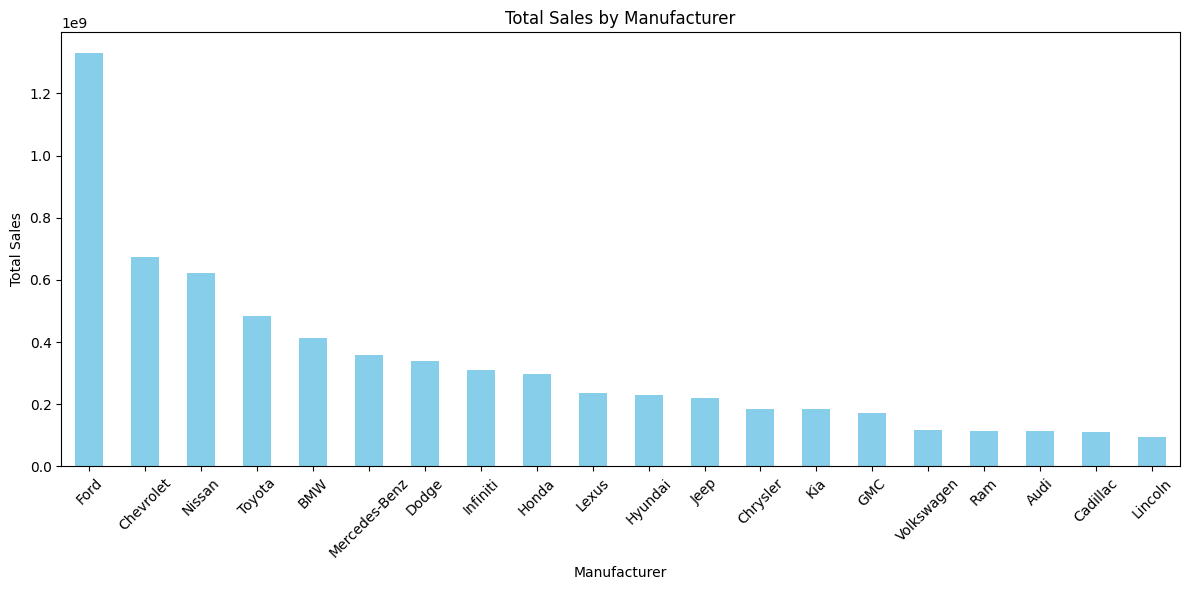

In [122]:

# Calculate total sales and total benefit for each manufacturer
manufacturer_stats = df.groupby('manufacturer').agg({'sellingprice': 'sum', 'estimatedprice': 'sum'})

# Sort manufacturers based on total sales
manufacturer_stats = manufacturer_stats.sort_values(by='sellingprice', ascending=False)

#limit the results to top manufacturers
manufacturer_stats = manufacturer_stats.head(20)

#drawing bar chart
plt.figure(figsize=(12, 6))

manufacturer_stats['sellingprice'].plot(kind='bar', color='skyblue')
plt.title('Total Sales by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

It is obvious that Ford sales was twice more than other manufacturers. After that, Chevrolet, Nissan and toyota are popular among American society.

###To understand the taste of market, what are the sum of sales per year group by the color?

The best way to answer this question is using a heatmap. Heatmaps shows the popularity of each groups by range of colors. We have two dimensions, year and color, and on measure, total of sales. \
Since there are more than 100 colors and 30 years, I limit the years after 2000 and top twenty colors.




<ipython-input-123-7b678f2d8a40>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sales_by_year_color_pivot = sales_by_year_color.pivot('color', 'year', 'sellingprice')


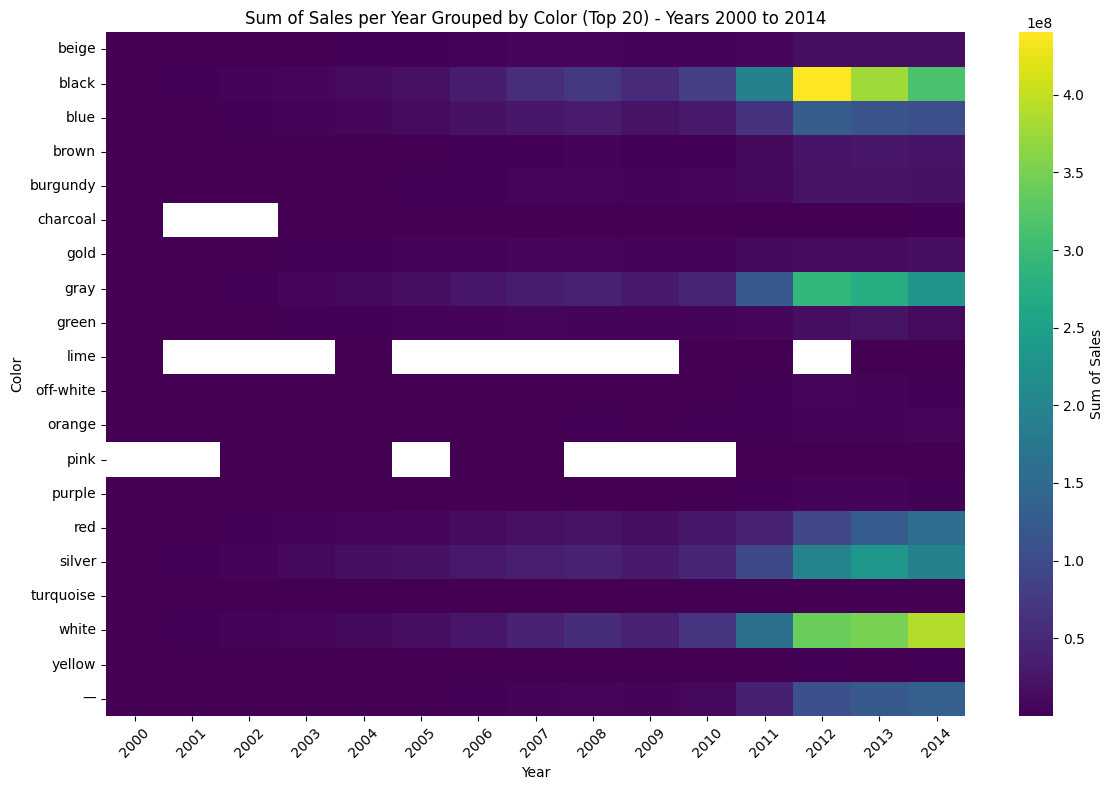

In [123]:
# years 2000 to 2014
df_filtered_years = df[(df['year'] >= 2000) & (df['year'] <= 2014)]

# calculate total sales for each color
color_sales = df_filtered_years.groupby('color')['sellingprice'].sum().reset_index()

# Select top 20 colors based on total sales
top_20_colors = color_sales.nlargest(20, 'sellingprice')['color']
df_top_20_colors = df_filtered_years[df_filtered_years['color'].isin(top_20_colors)]

# group by  'year' and 'color', and calculating the sum of sales for each group
sales_by_year_color = df_top_20_colors.groupby(['year', 'color'])['sellingprice'].sum().reset_index()
sales_by_year_color_pivot = sales_by_year_color.pivot('color', 'year', 'sellingprice')

# draw a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_by_year_color_pivot, cmap='viridis', cbar_kws={'label': 'Sum of Sales'})
plt.title('Sum of Sales per Year Grouped by Color (Top 20) - Years 2000 to 2014')
plt.xlabel('Year')
plt.ylabel('Color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As the heatmap showed, White and Black are among the most popular color, specially during last years. Gray, Red and Silver followed them.

###Which type of gear are better to sell? Automatic or manual?

It could be different year by year. To answer this question, we need to know the sum of sales per year per transmission type(Automatic or Manual Gear). I decided to show the result in a stack-bar chart in a way that the comparison between all types per year is easy to read. \



<ipython-input-124-a44d17f0f374>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sales_by_year_transmission_pivot = sales_by_year_transmission.pivot('year', 'gear', 'sellingprice')


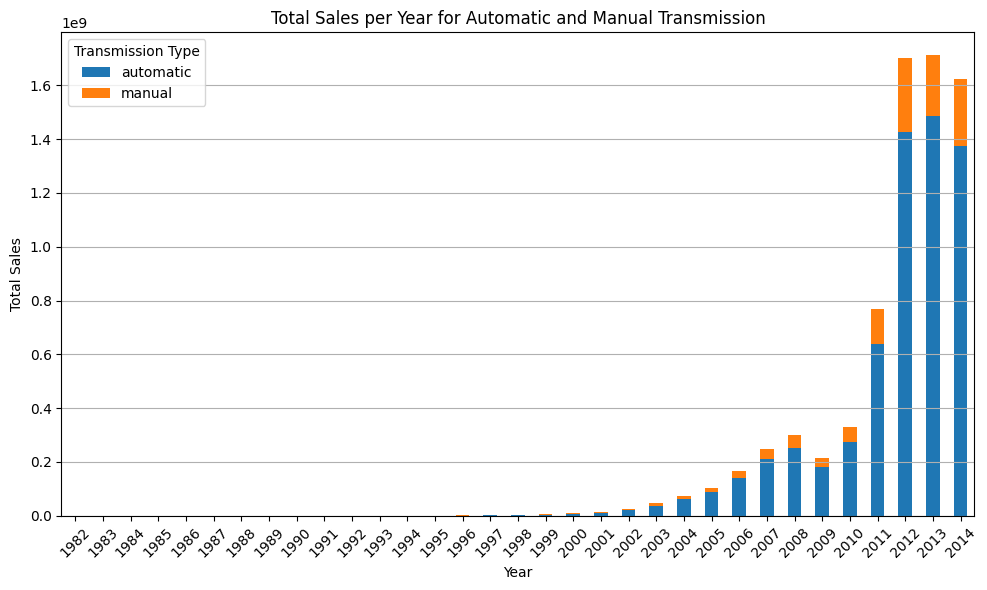

In [124]:
# group 'year' and 'transmission_type', and calculating the sum of sales for each group
sales_by_year_transmission = df.groupby(['year', 'gear'])['sellingprice'].sum().reset_index()

sales_by_year_transmission_pivot = sales_by_year_transmission.pivot('year', 'gear', 'sellingprice')

# draw a stacked bar chart to compare total sales per year for automatic and manual transmission
sales_by_year_transmission_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Sales per Year for Automatic and Manual Transmission')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Transmission Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

By comparing the height of colors in each year, it has been shown that Manual Gears has less than one-fifth of the sales per year and Automatic Gears are way more popular among customers. \


###In the matter of mileage odometer, what mileages have most share of sales in our company?

It is a bit hard to answer this question. The odometer range is too wide and there is no way of grouping manually, since the frequency of each group could be different. The best solution of grouping for these kind of questions is to cluster the range. For clustering I used KMEAN library and try to cluster the odometer by ten clusters. Then I calculate the sum of sales for each cluster and found out which clusters have the most share of our sales. \



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


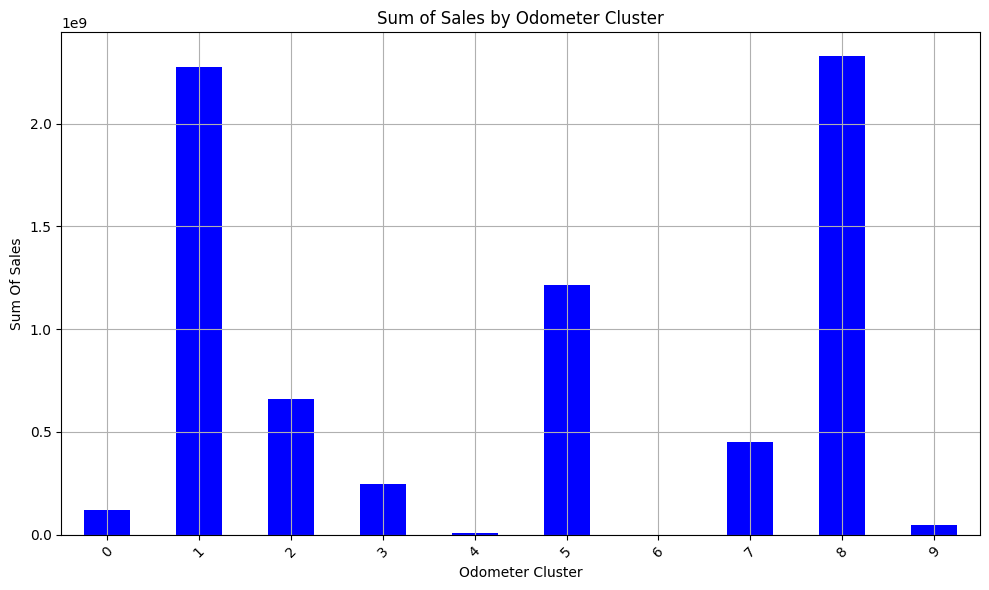

Cluster 0: Odometer Range: 0.00 - 16138.87 KM
Cluster 1: Odometer Range: 16138.87 - 35417.92 KM
Cluster 2: Odometer Range: 35417.92 - 56602.85 KM
Cluster 3: Odometer Range: 56602.85 - 80667.35 KM
Cluster 4: Odometer Range: 80667.35 - 104467.57 KM
Cluster 5: Odometer Range: 104467.57 - 130694.73 KM
Cluster 6: Odometer Range: 130694.73 - 161707.60 KM
Cluster 7: Odometer Range: 161707.60 - 203136.48 KM
Cluster 8: Odometer Range: 203136.48 - 274231.46 KM
Cluster 9: Odometer Range: 274231.46 - 991056.99 KM


In [125]:
# Perform K-means clustering
n_clusters = 10
kmeans = km(n_clusters=n_clusters, random_state=42)
df['odometer_cluster'] = kmeans.fit_predict(X)

# group by odometer cluster and calculate the sum selling price
cluster_price_avg = df.groupby('odometer_cluster')['sellingprice'].sum()

# draw sum of selling price for each odometer cluster
plt.figure(figsize=(10, 6))
cluster_price_avg.plot(kind='bar', color='blue')
plt.title('Sum of Sales by Odometer Cluster')
plt.xlabel('Odometer Cluster')
plt.ylabel('Sum Of Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

cluster_centroids = kmeans.cluster_centers_
# sort the centroids in ascending order
sorted_centroids = np.sort(cluster_centroids, axis=0)

for i, centroid in enumerate(sorted_centroids):
    lower_bound = 0 if i == 0 else sorted_centroids[i - 1][0]
    upper_bound = centroid[0]
    print(f"Cluster {i}: Odometer Range: {lower_bound:.2f} - {upper_bound:.2f}","KM")


As it is shown above,there is a huge difference between two clusters and other 8 clusters.Clusters number 1 and 8 have the greatest share of our sales. Cluster 1 is related to cars with odometer range (16138 km - 35417 km) and cluster number 8 is related to cars with odometer range of (203136 km - 274231 km).

###What are the most impactful car features for a profitable selling?

We are not sure about which features leads us to a better selling. This means that maybe the color, body type, manufacture or even gear type could leads us to a better sale. We defined Benefit as subtract of estimated value of the car and the selling price. Now we can use statistical techniques to find out the most impactful features on benefit. One common technique is to use machine learning algorithms such as random forests. \
In the following code, I tried to use random forest algorithm to find the feature that affects better selling profit. \



In [127]:

# Select relevant features and target variable
X = df[['body', 'gear', 'color', 'manufacturer']]
y = df['benefit']

# Convert categorical variables into numerical using one-hot encoding
X = pd.get_dummies(X)

# Initialize the random forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

KeyboardInterrupt: 

asd


# Conclusion

In this project, I tried to answer several business questions related to a company which sells new and used cars in the USA. I had the chance to access the sales data of several years between 1982 to 2015. At the first steps, I tried to explore data and get to know the dataset. Then I tried to remove noisy data and make them clean. Finally, I calculated more features and get it ready to analyse and answer questions. \
I used several techniques is this project. I used different lists in python, different packages and libraries. Also, I used clustering and machine learning techniques. Finally, the result has been shown in very different chart types such as bar chart, stacked-bar chart, heatmap and tables. I add a result explaination follows the chart to make the analysis easier for stakeholder and I believe those analysis could leads the company a better sales in future.



# References

1.  SYED ANWAR (2024) Vehicle Sales Data. Available at: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data/ (Accessed 01 March 2024).

